In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 100

# Предсказание показателей ипотечного кредитования в зависимосте от времени

Prediction of mortgage lending indicators depending on time

# 1. Загрузить данные.

In [ ]:
path = '/content/drive/MyDrive/Datasets/ТММиАД/Ипотечное кредитование.xls'
df = pd.read_excel(path, skiprows = 1)
cols = list(df.columns[2:])

In [ ]:
df.head(1)

,Год,Месяц,"Просроченная задолженность, миллион рублей","Количество предоставленных кредитов, единица","Объем предоставленных кредитов, миллион рублей","Задолженность по предоставленным кредитам, миллион рублей","Средневзвешенный срок кредитования, месяц","Средневзвешенная ставка, процент"
0,2018,январь,3780,21035,47107,1125666,195.3,9.61


In [ ]:
df.tail(1)

,Год,Месяц,"Просроченная задолженность, миллион рублей","Количество предоставленных кредитов, единица","Объем предоставленных кредитов, миллион рублей","Задолженность по предоставленным кредитам, миллион рублей","Средневзвешенный срок кредитования, месяц","Средневзвешенная ставка, процент"
72,2024,январь,62296,76002,271907,18214466,296.2,8.45


In [ ]:
df.head(13)

,Год,Месяц,"Просроченная задолженность, миллион рублей","Количество предоставленных кредитов, единица","Объем предоставленных кредитов, миллион рублей","Задолженность по предоставленным кредитам, миллион рублей","Средневзвешенный срок кредитования, месяц","Средневзвешенная ставка, процент"
0,2018,январь,3780,21035,47107,1125666,195.3,9.61
1,2018,февраль,3933,27035,61232,1128156,193.2,9.57
2,2018,март,4000,29989,69362,1150331,195.3,9.54
3,2018,апрель,4102,30667,70826,1166878,194.9,9.43
4,2018,май,4249,29211,66626,1183471,194.7,9.39
5,2018,июнь,4335,28814,67585,1202679,195.0,9.26
6,2018,июль,4434,30349,71460,1223454,194.6,9.09
7,2018,август,4455,33510,80349,1252185,195.4,9.05
8,2018,сентябрь,4503,32624,78567,1282397,195.3,9.11
9,2018,октябрь,4715,34894,85710,1312522,196.4,9.16


# 2. Проверить на наличие пропусков, дубликатов, некорректных значений, аномалий.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Год                                                        73 non-null     int64  
 1   Месяц                                                      73 non-null     object 
 2   Просроченная задолженность, миллион рублей                 73 non-null     int64  
 3   Количество предоставленных кредитов, единица               73 non-null     int64  
 4   Объем предоставленных кредитов, миллион рублей             73 non-null     int64  
 5   Задолженность по предоставленным кредитам, миллион рублей  73 non-null     int64  
 6   Средневзвешенный срок кредитования, месяц                  73 non-null     float64
 7   Средневзвешенная ставка, процент                           73 non-null     float64
dtypes: float64(2)

In [ ]:
(df == 0).all(axis = 0)

Год                                                          False
Месяц                                                        False
Просроченная задолженность, миллион рублей                   False
Количество предоставленных кредитов, единица                 False
Объем предоставленных кредитов, миллион рублей               False
Задолженность по предоставленным кредитам, миллион рублей    False
Средневзвешенный срок кредитования, месяц                    False
Средневзвешенная ставка, процент                             False
dtype: bool

In [ ]:
(df.duplicated()).all()

False

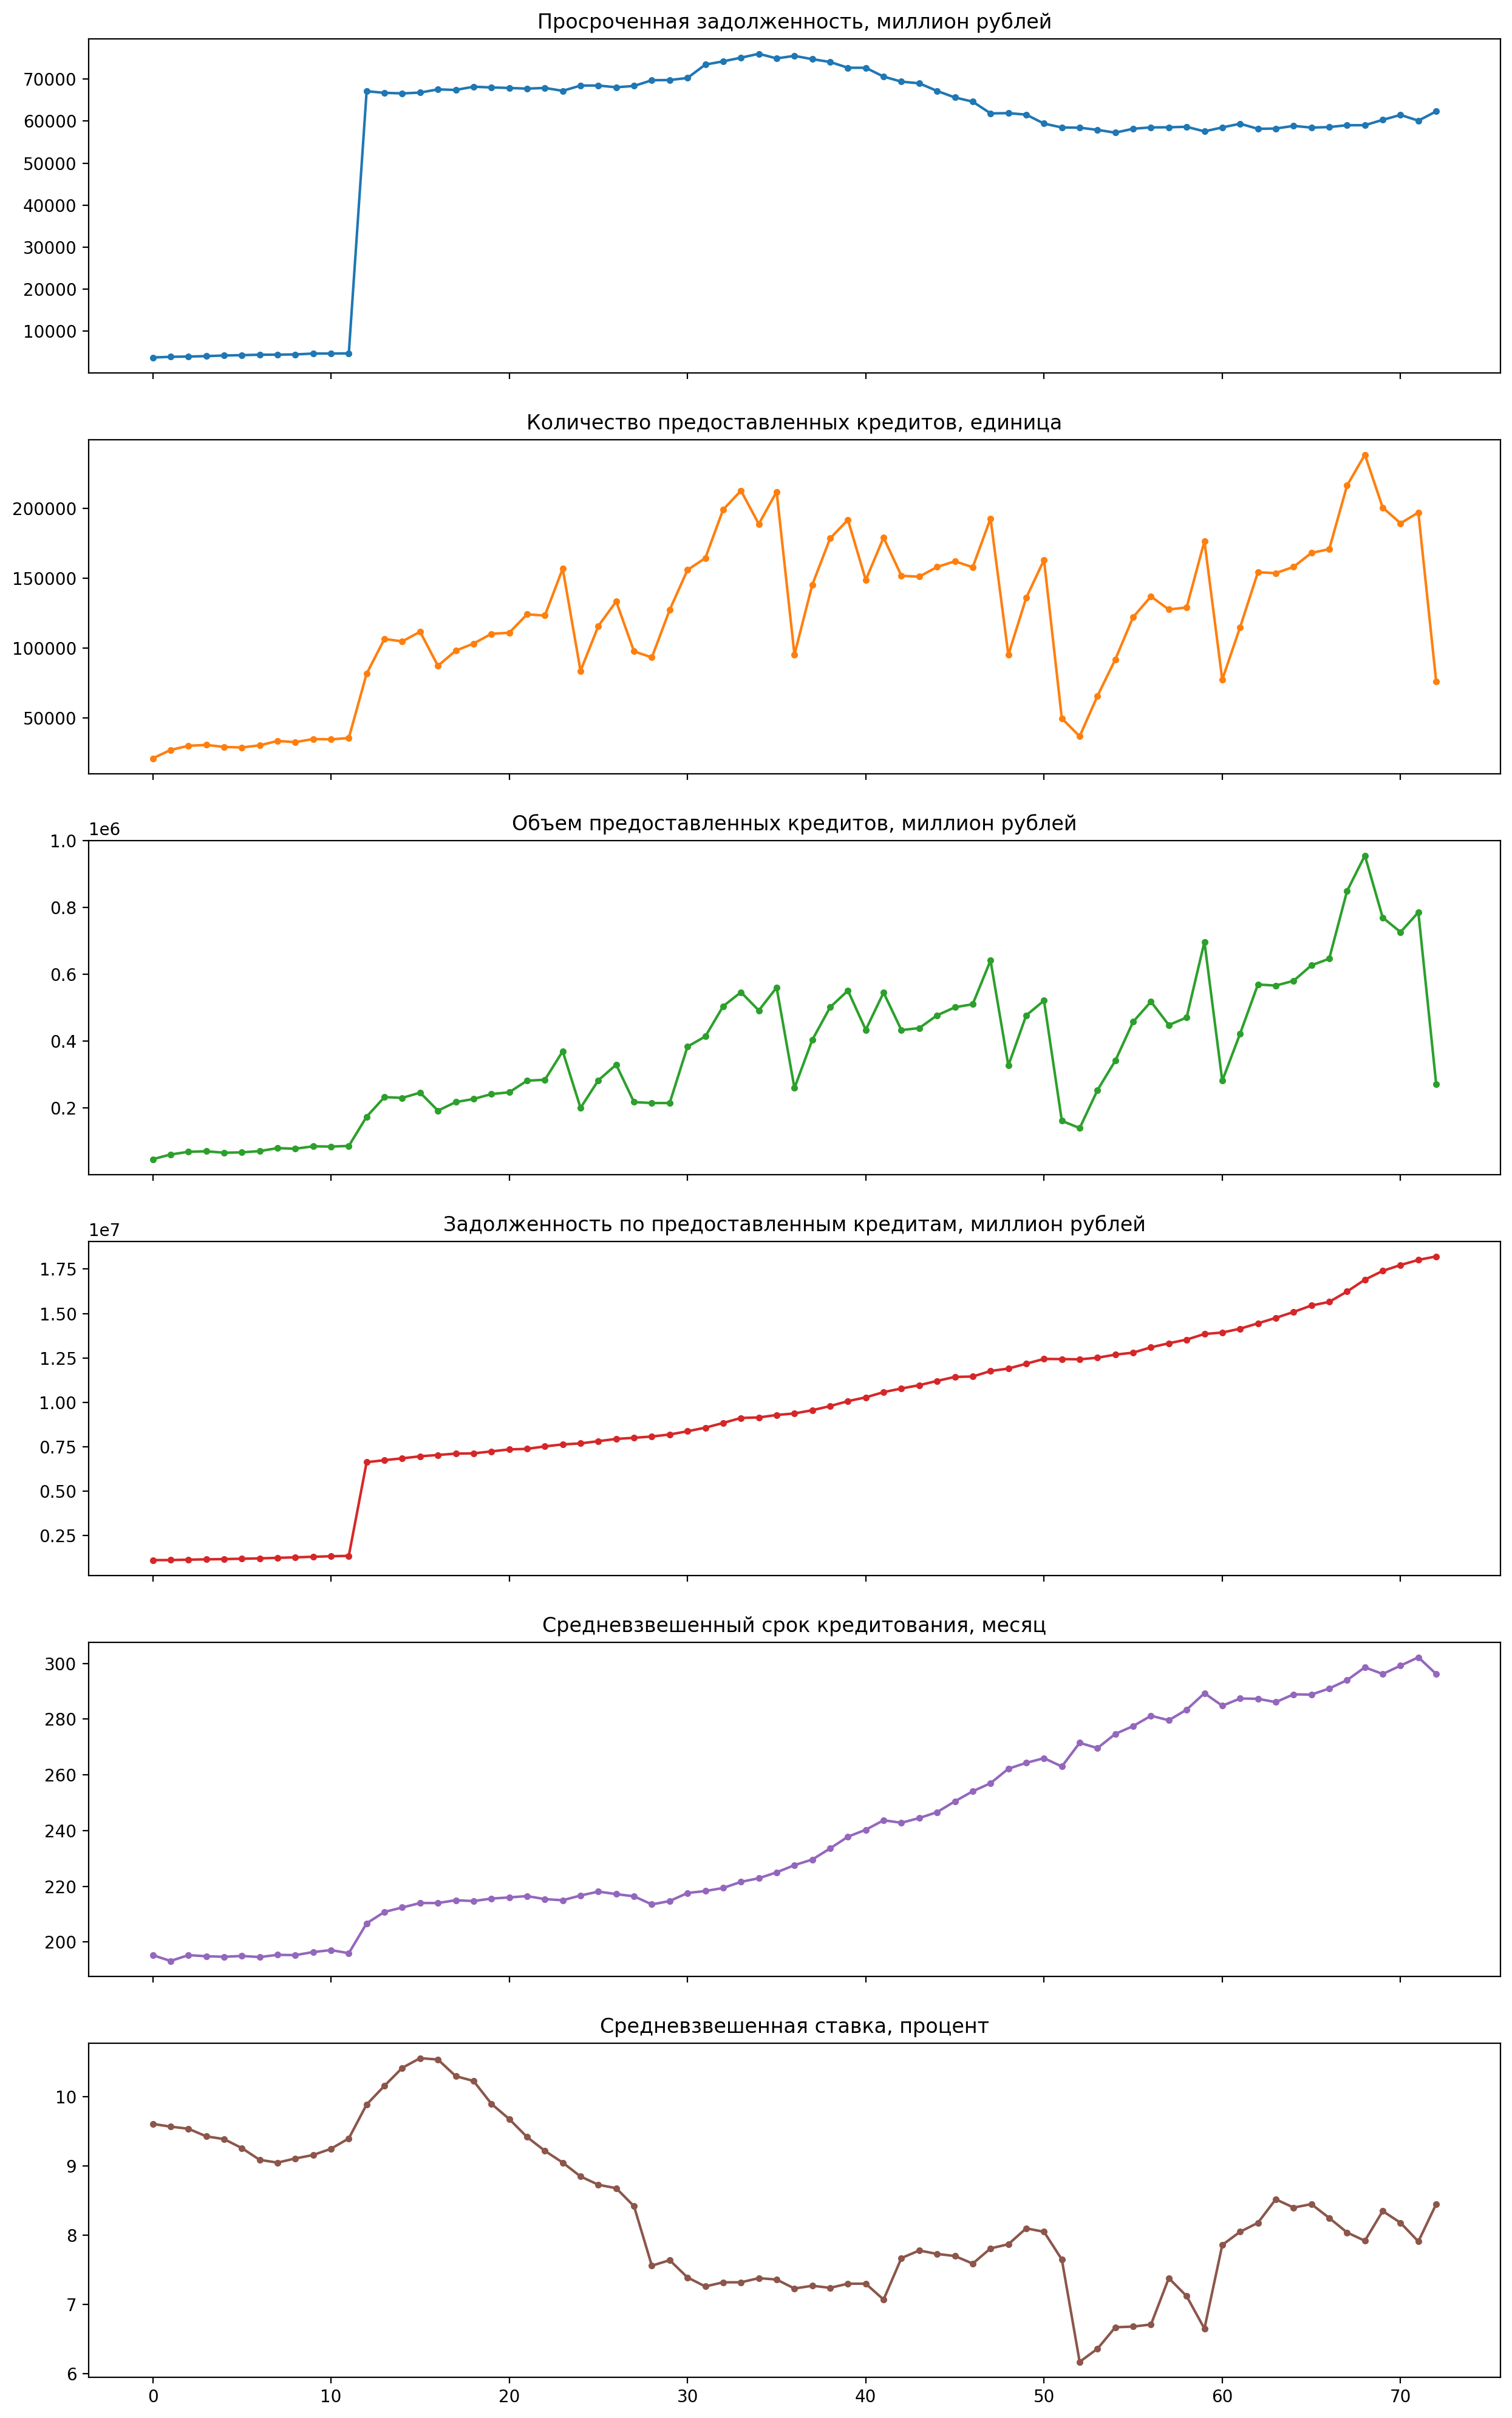

In [ ]:
df[cols].plot(figsize = (15, 25), subplots = True, style = '.-', title = cols, legend = False);

In [ ]:
#аномалии
df = df.iloc[12:]
df.reset_index(drop = True, inplace = True )

2.      Провести обогащение данных: например, доля просроченной задолженности в общем объеме задолженности.

In [ ]:
cols = list(cols) + ['Доля просроченной задолженности']
df['Доля просроченной задолженности'] = df['Просроченная задолженность, миллион рублей']/df['Задолженность по предоставленным кредитам, миллион рублей']

<ipython-input-12-27d783fbd97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Доля просроченной задолженности'] = df['Просроченная задолженность, миллион рублей']/df['Задолженность по предоставленным кредитам, миллион рублей']


Составить математическую модель взаимосвязи показателей, которая позволит на основе прогноза нескольких показателей «разворачивать» прогноз для остальных показателей (зная долю можно посчитать объем). Математическая модель будет выражена в виде формул, соотношений, уравнений.



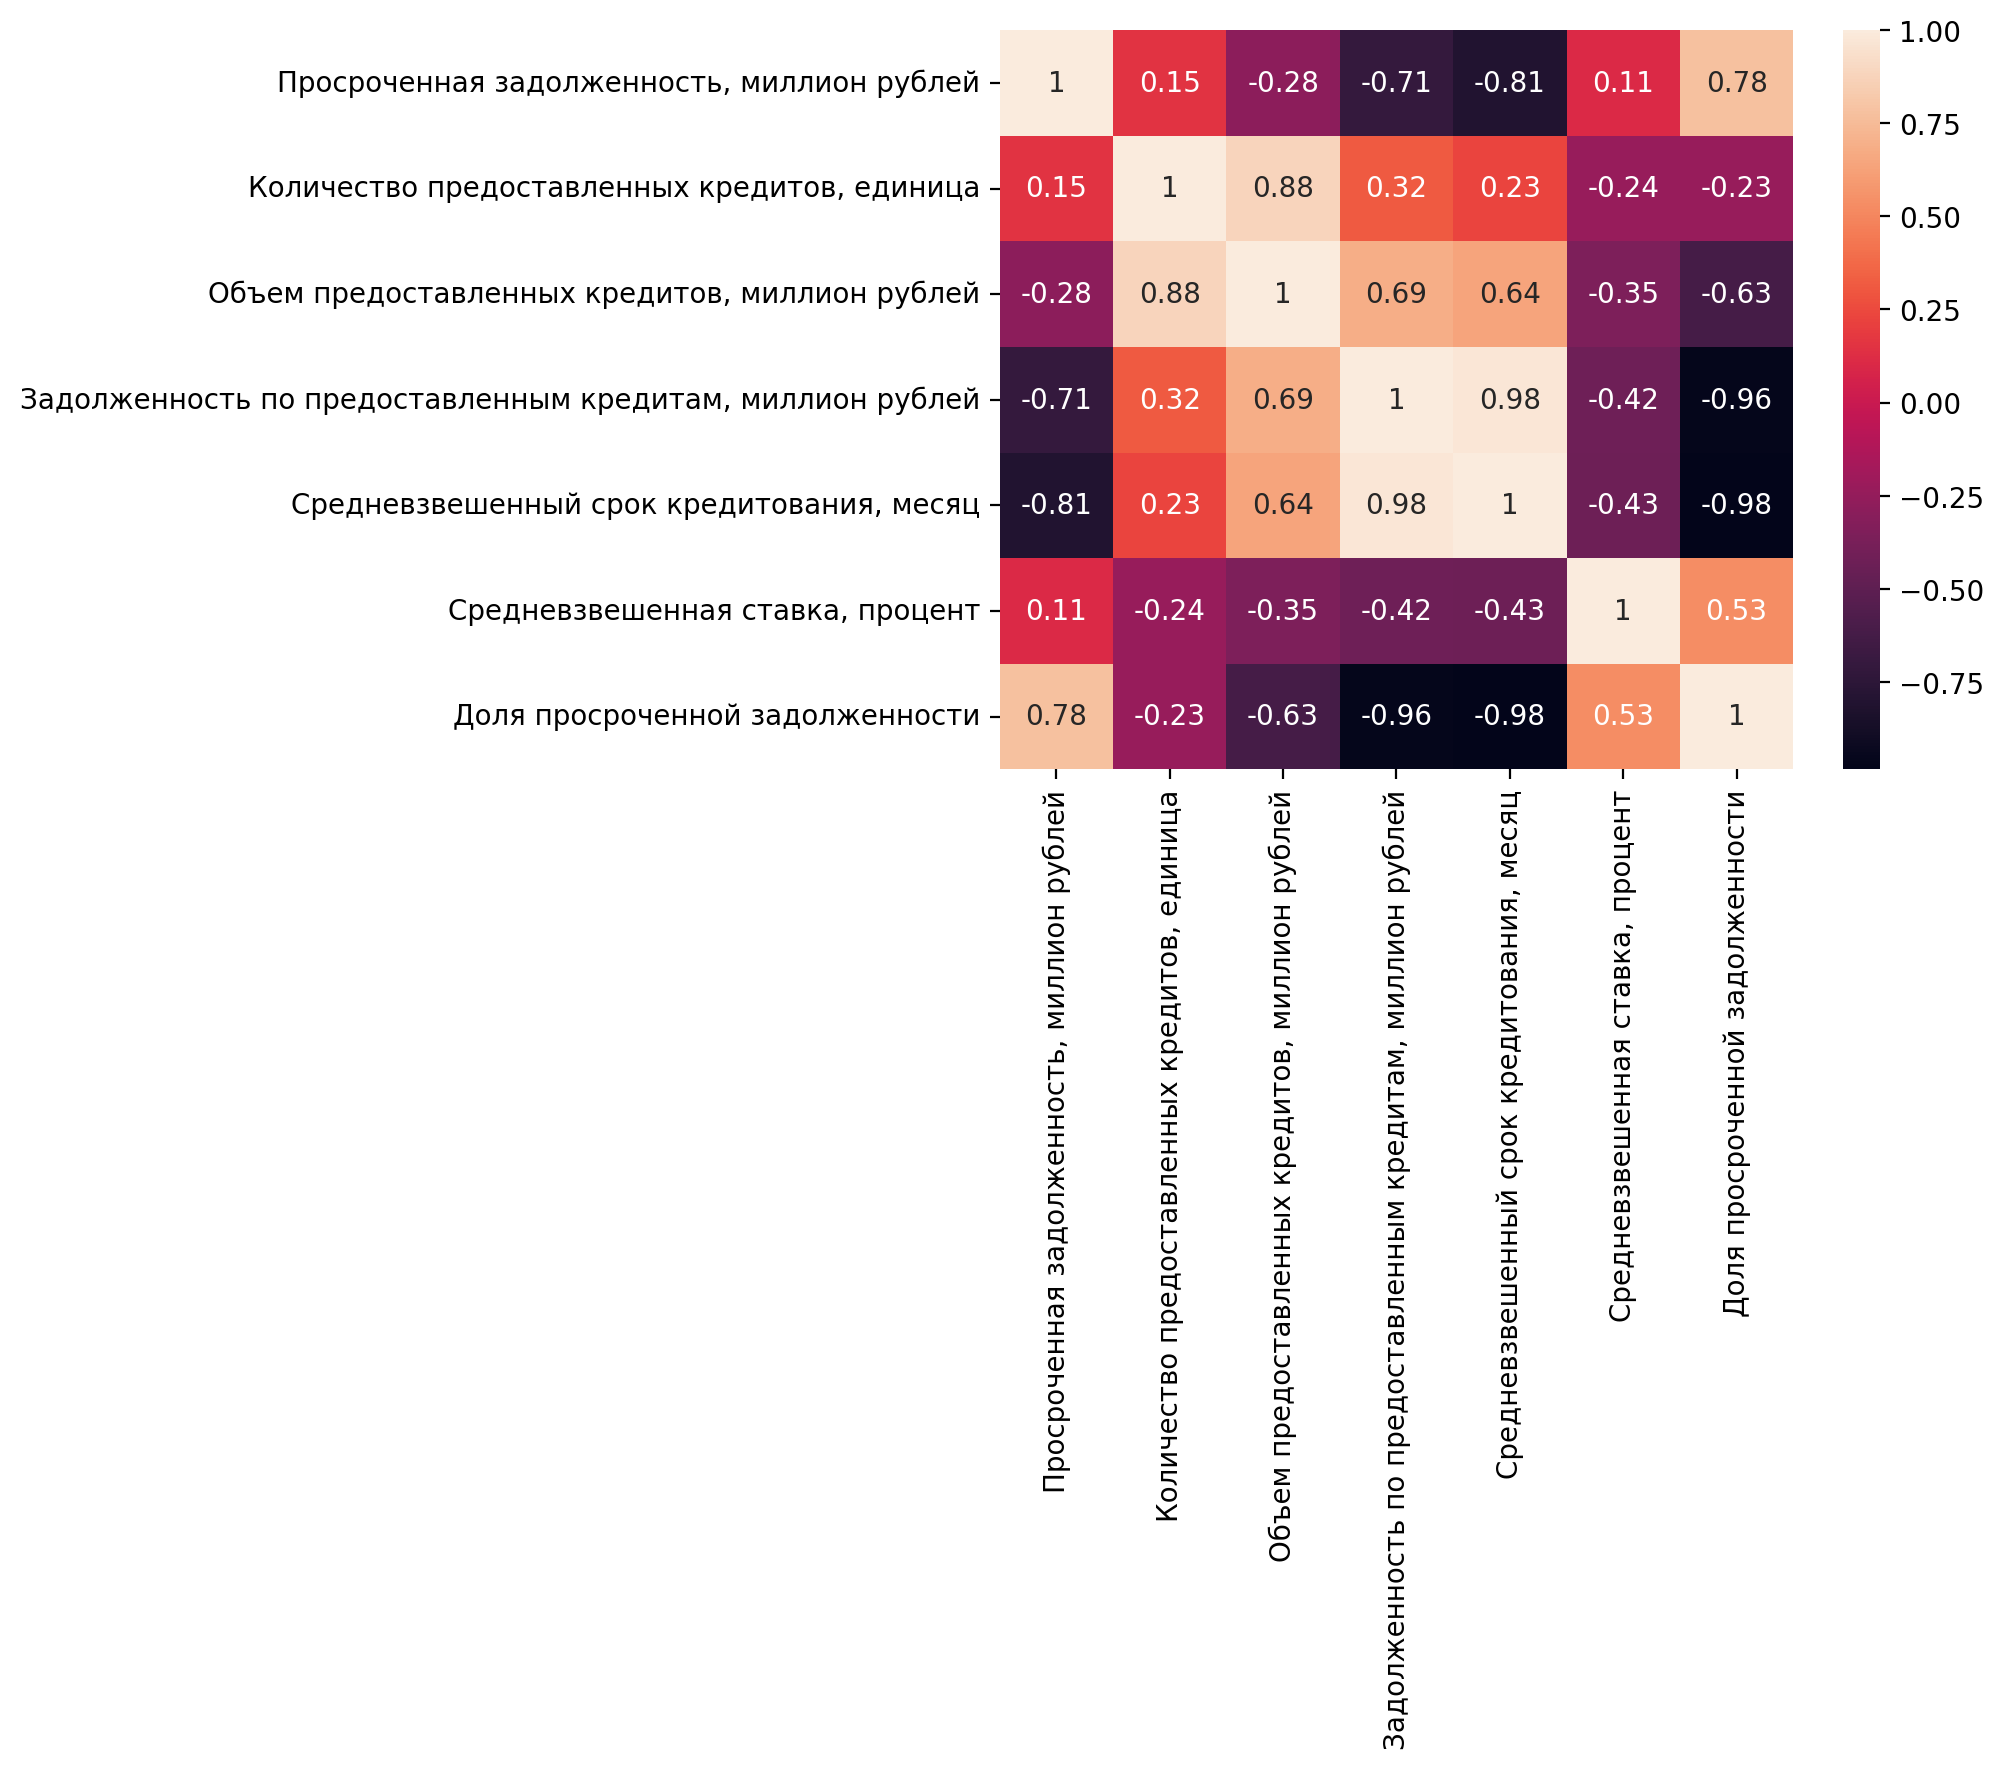

In [ ]:
sns.heatmap(df[cols].corr(), annot = True);

Корреляция между **Задолженность по предоставленным кредитам** и **Средневзвешенный срок кредитования, месяц** = 0.98

\

Корреляция между **Объем предоставленных кредитов, миллион рублей** и **Средневзвешенный срок кредитования, месяц** = 0.64

Корреляция между **Объем предоставленных кредитов, миллион рублей** и **Задолженность по предоставленным кредитам** = 0.69

Чтобы избавиться от мультиколлинеарности очистим регрессоры от тренда

In [ ]:
time = np.array(df.index + 1)[:, None]

In [ ]:
l1 = LinearRegression().fit(time , df[cols[2]])
er1 = l1.predict(time) - df[cols[2]]

l2 = LinearRegression().fit(time , df[cols[3]])
er2 = l2.predict(time) - df[cols[3]]

In [ ]:
l1.score(time , df[cols[2]]), l2.score(time , df[cols[3]])

(0.4597761962169937, 0.9658253097836609)

In [ ]:
X = np.column_stack([er1, er2])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.01210022106296127

In [ ]:
X = np.column_stack([abs(er1), abs(er2)])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.16543507831554893

In [ ]:
X = np.column_stack([er1**2, er2**2])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.1932052362435177

In [ ]:
X = np.column_stack([er1, er2, er1**2, er2**2])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.23857859565945116

In [ ]:
X = np.column_stack([er1, er2, er1**2, er2**2, er1**3, er2**3])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.31882084140309197

In [ ]:
X = np.column_stack([er1, er2, er1**2, er2**2, er1**3, er2**3, er1 * er2])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.3781815908989682

In [ ]:
X = np.column_stack([er1, er2, abs(er1), abs(er2), er1**2, er2**2, er1**3, er2**3, er1 * er2,])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.4104680938644646

In [ ]:
X = np.column_stack([er1, er2, abs(er1), abs(er2), er1**2, er2**2, er1**3, er2**3, er1 * er2, er1**2 * er2, er1 * er2**2])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.4971669413591957

In [ ]:
X = np.column_stack([l1.predict(time), l2.predict(time)])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.9504284851646543

In [ ]:
X = np.column_stack([df[cols[2]], df[cols[3]]])

reg = LinearRegression().fit(X, df[cols[4]])
reg.score(X, df[cols[4]])

0.9553865677465339

# 3.      Провести графический и описательный анализ данных.

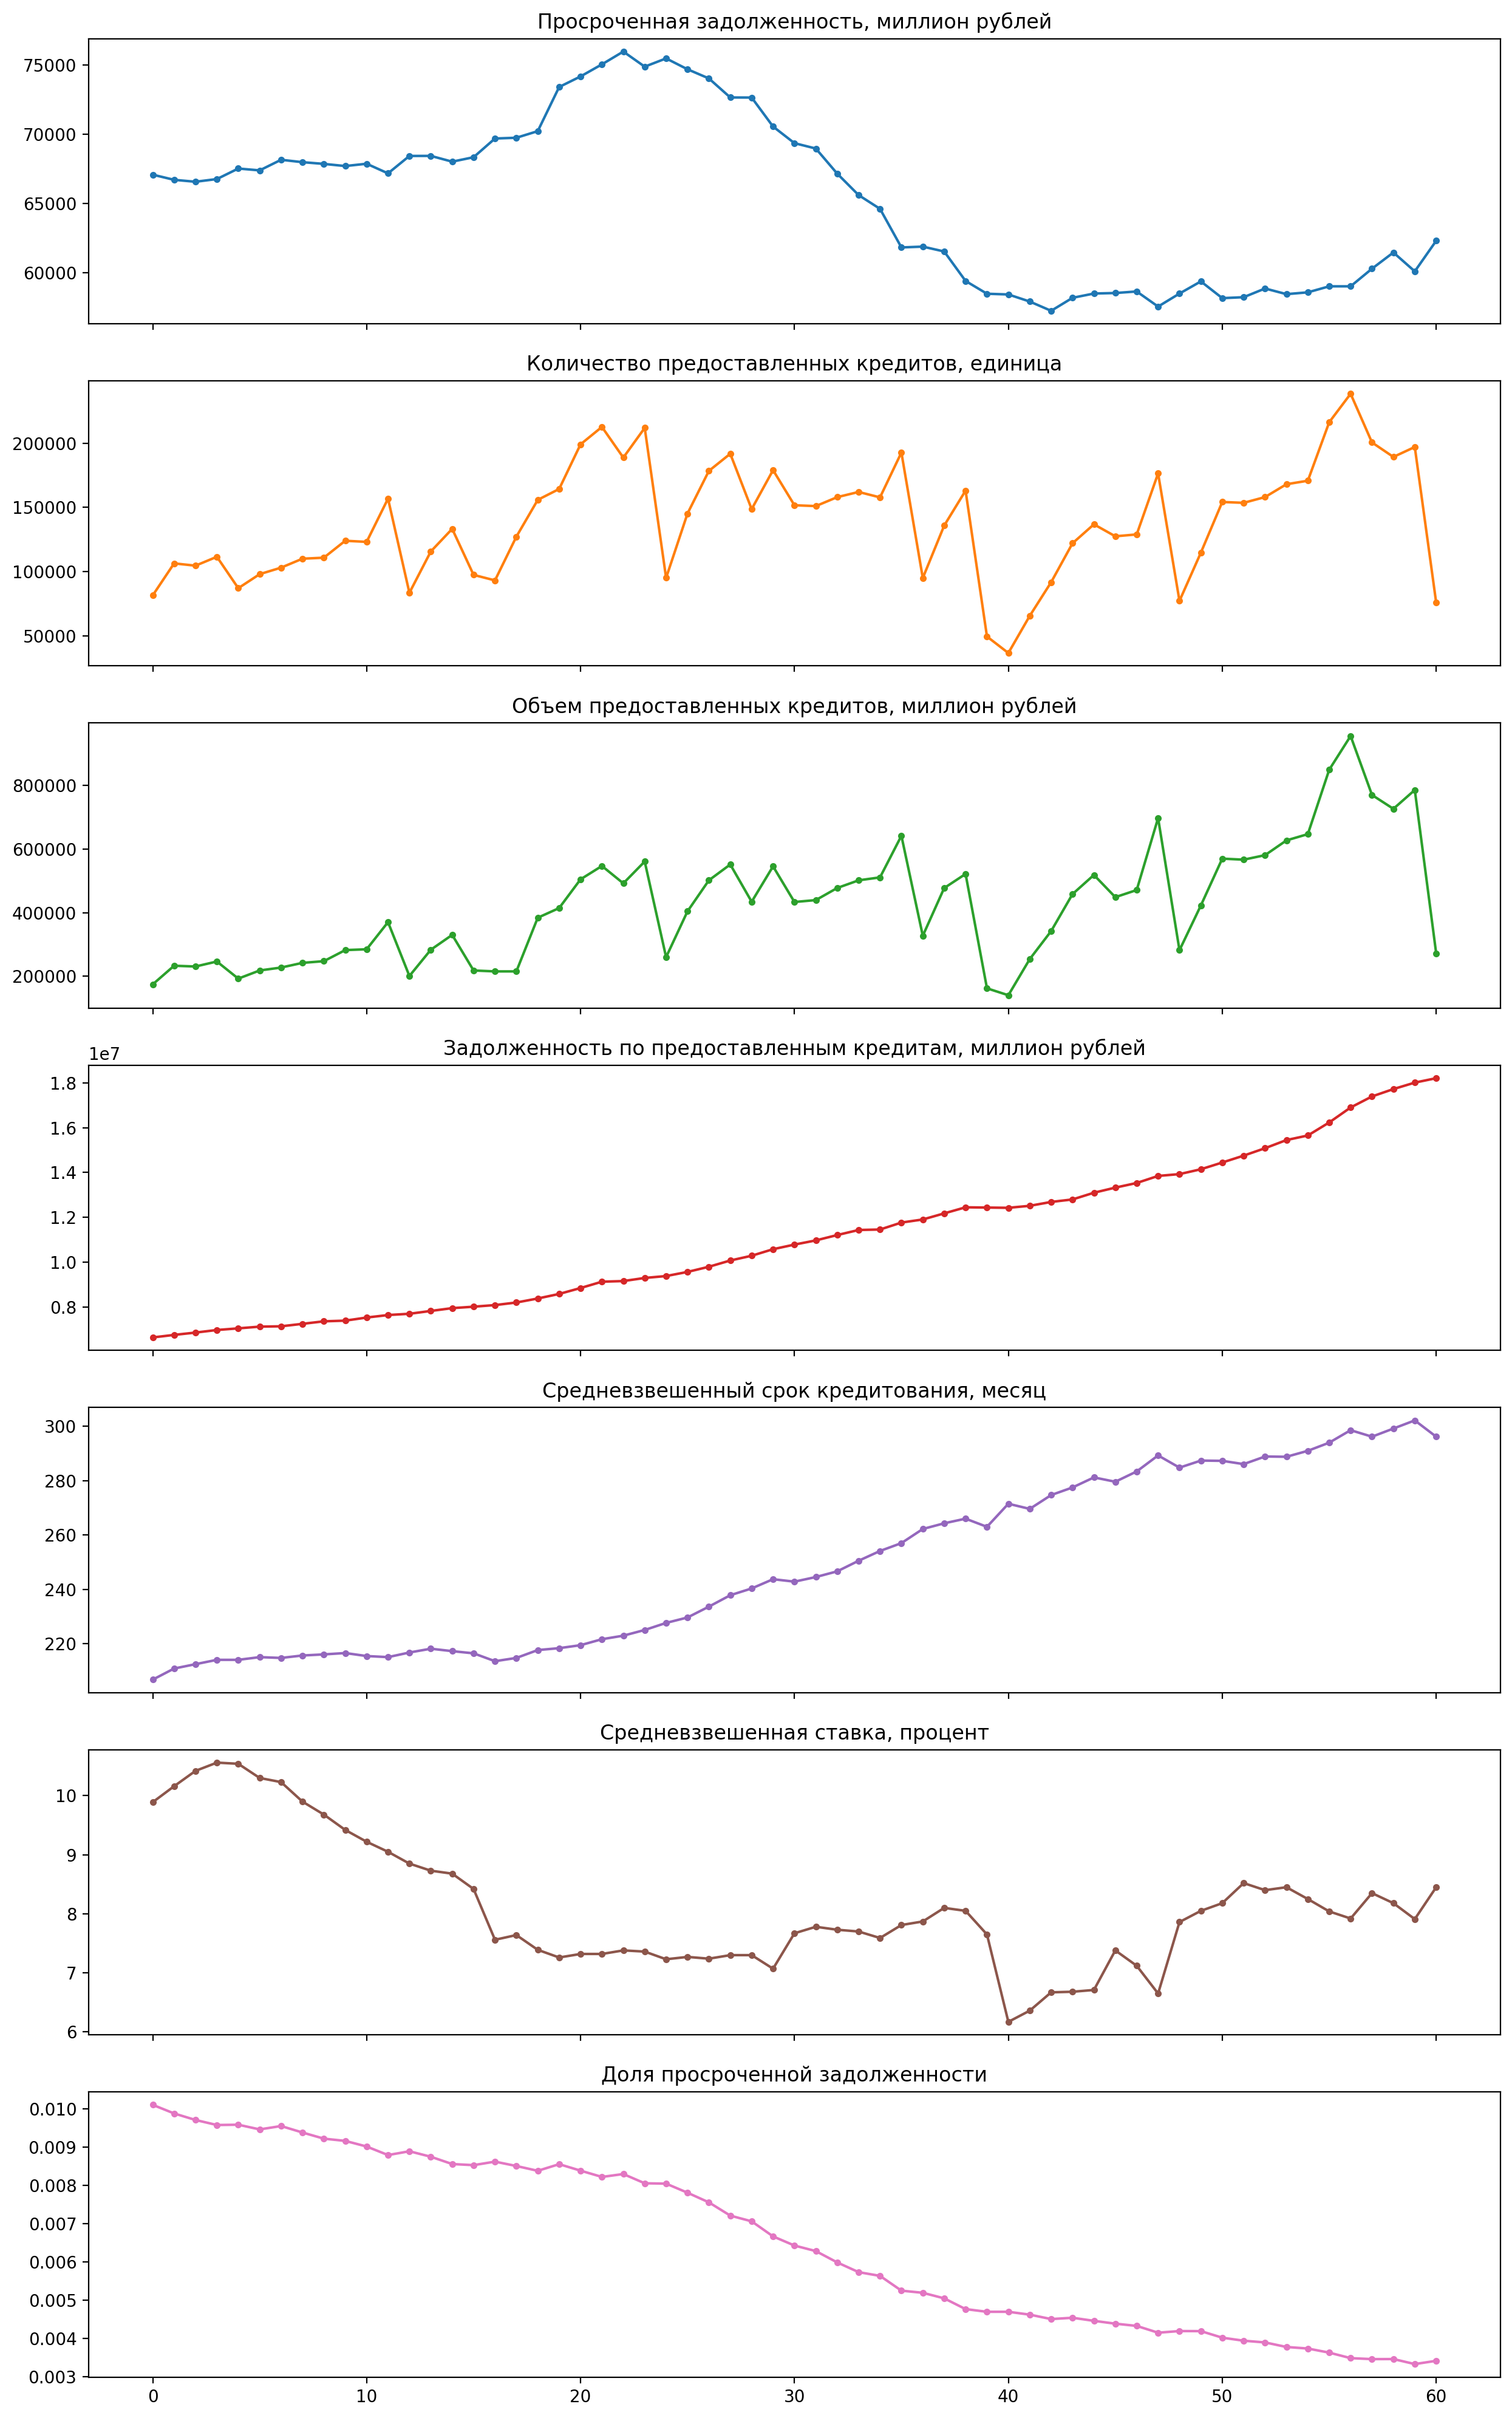

In [ ]:
df[cols].plot(figsize = (15, 25), subplots = True, style = '.-', title = cols, legend = False);

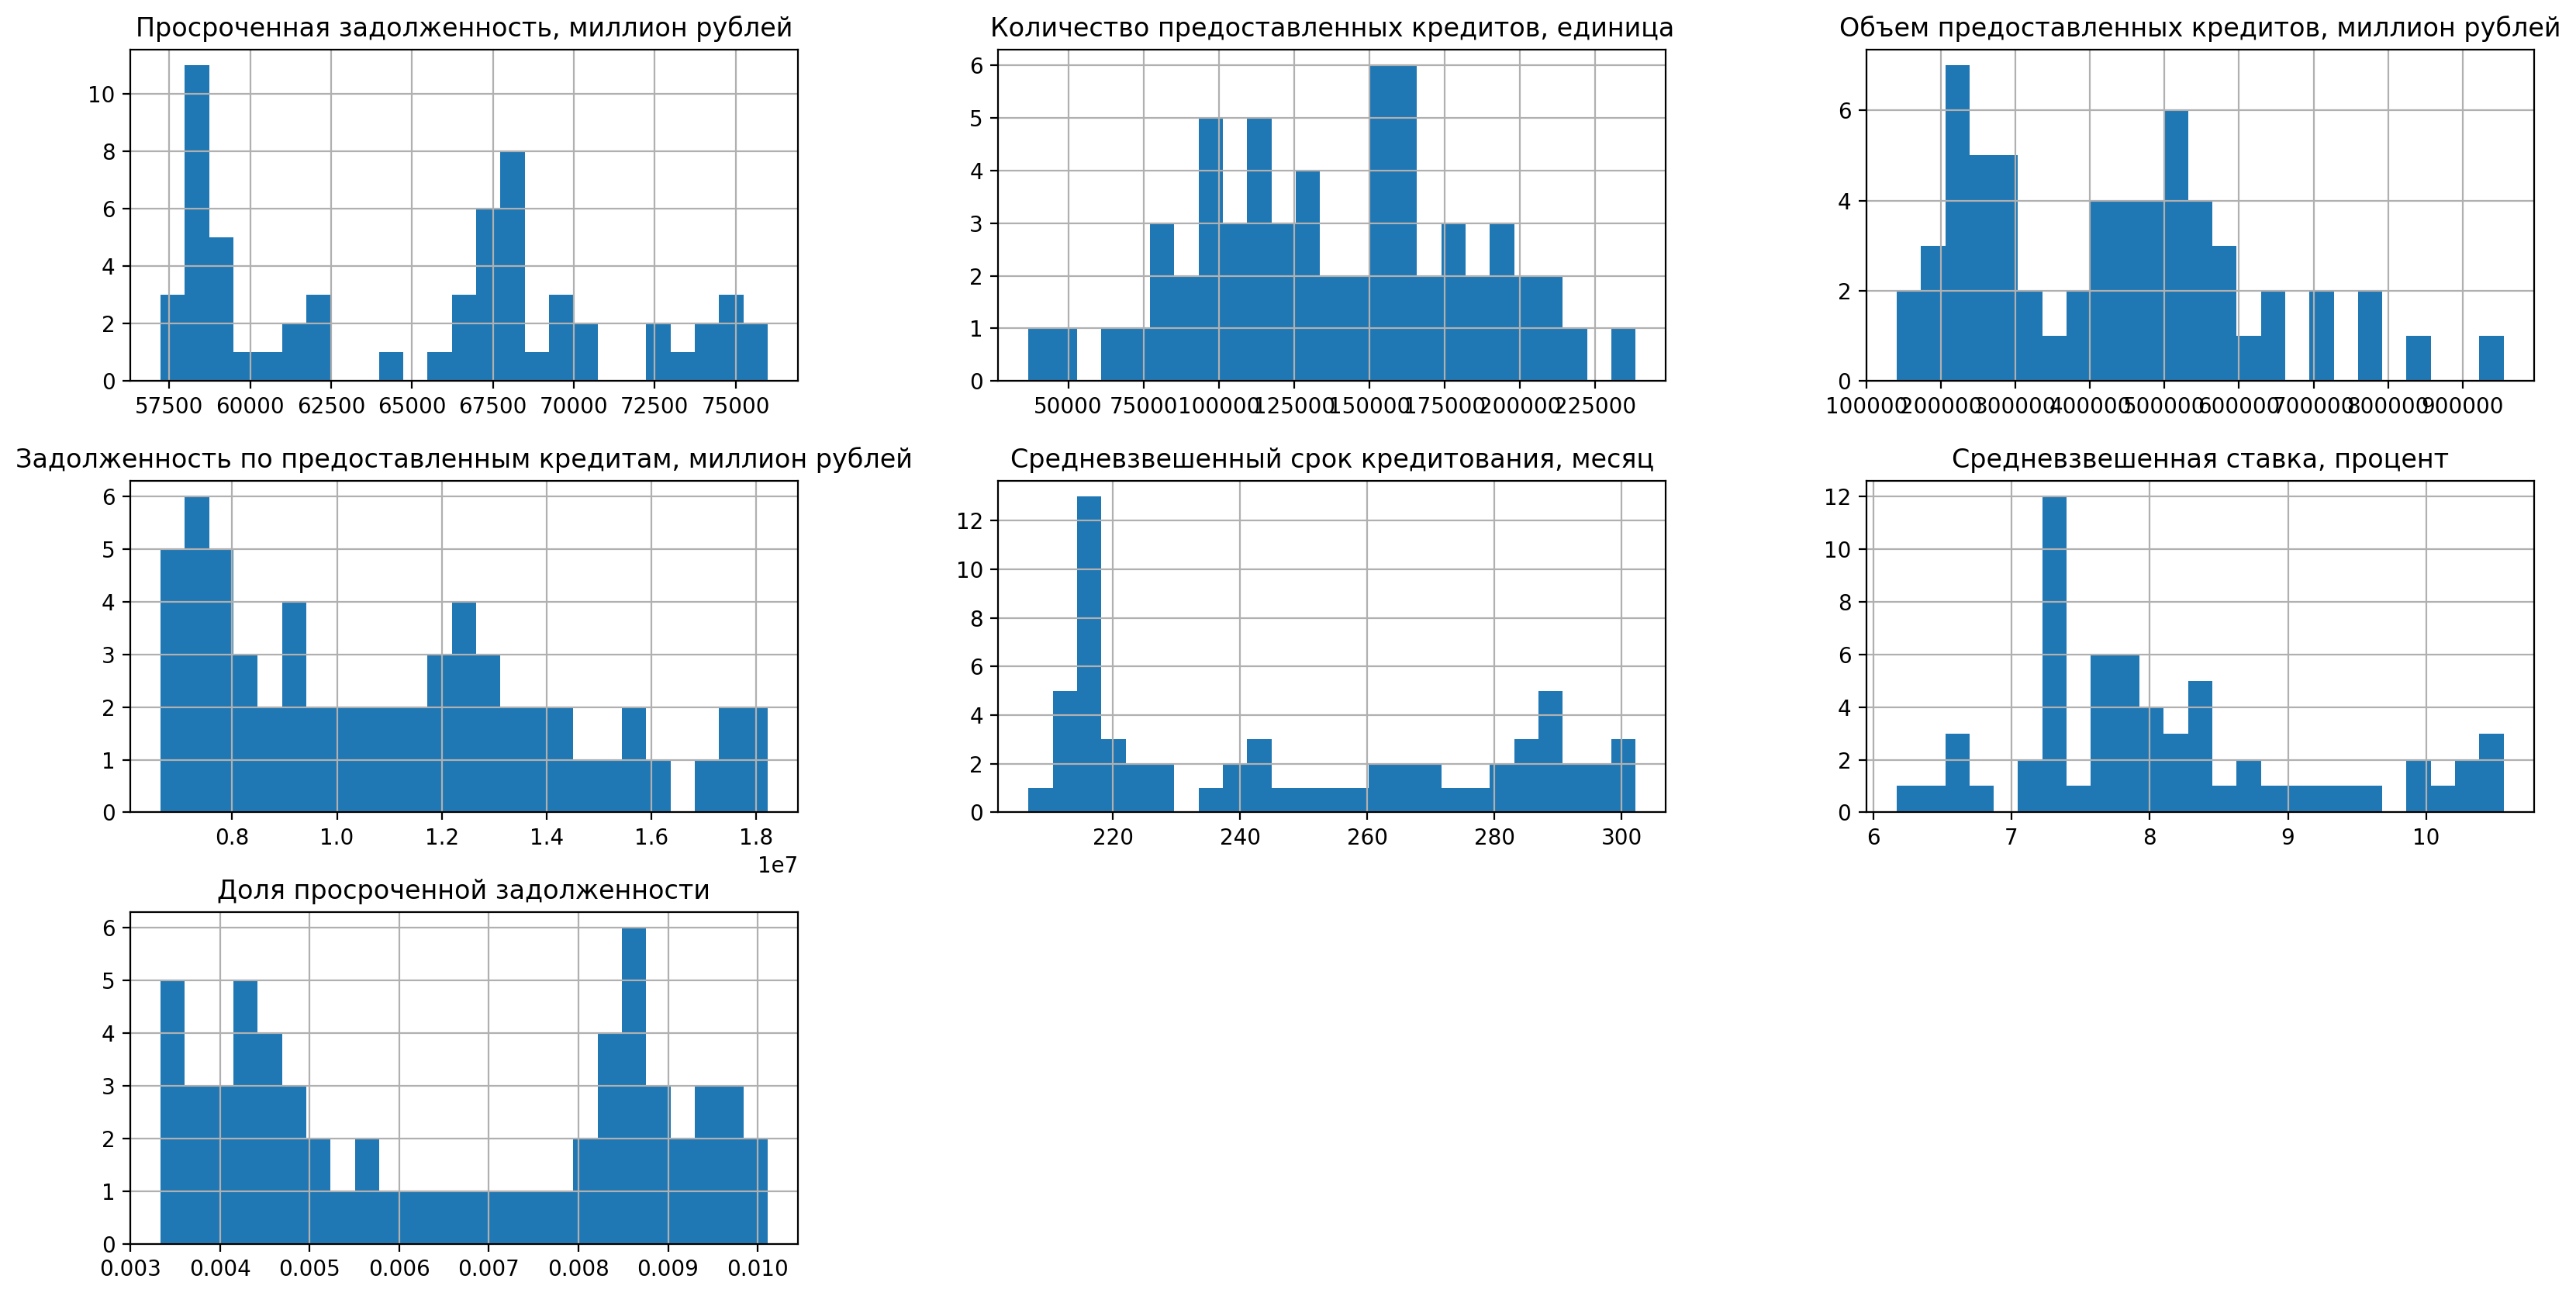

In [ ]:
df[cols].hist(figsize= (20, 10), bins = 25);

#  4.Разработать прогнозную модель исходных показателей.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import scipy.stats as sts

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [ ]:
n, k = df.shape[0], 1
t_kr = sts.t.isf(0.05/2, df = n - k - 1)

def forecast_graph(data, title = '', t_kr = t_kr):
    model = ExponentialSmoothing(data, seasonal_periods=12, trend='add', seasonal = 'add')
    fit = model.fit()

    # Расчет стандартной ошибки прогноза
    std_er = np.std(fit.resid)
    forecast = fit.forecast(steps = 12)
    low_border = forecast - std_er*t_kr
    high_border = forecast + std_er*t_kr
    #Визуализируем
    plt.figure(figsize=(20,4))
    plt.title(title)
    plt.plot(df.index, data, label='Реальные значения', marker='.', color = 'black')
    plt.fill_between(forecast.index, low_border, high_border, alpha=0.2, label=f'доверительный интервал модели');
    plt.plot(forecast.index, forecast, label='Прогноз', marker='.', color = 'green')

    plt.legend()
    plt.grid()
    plt.show()

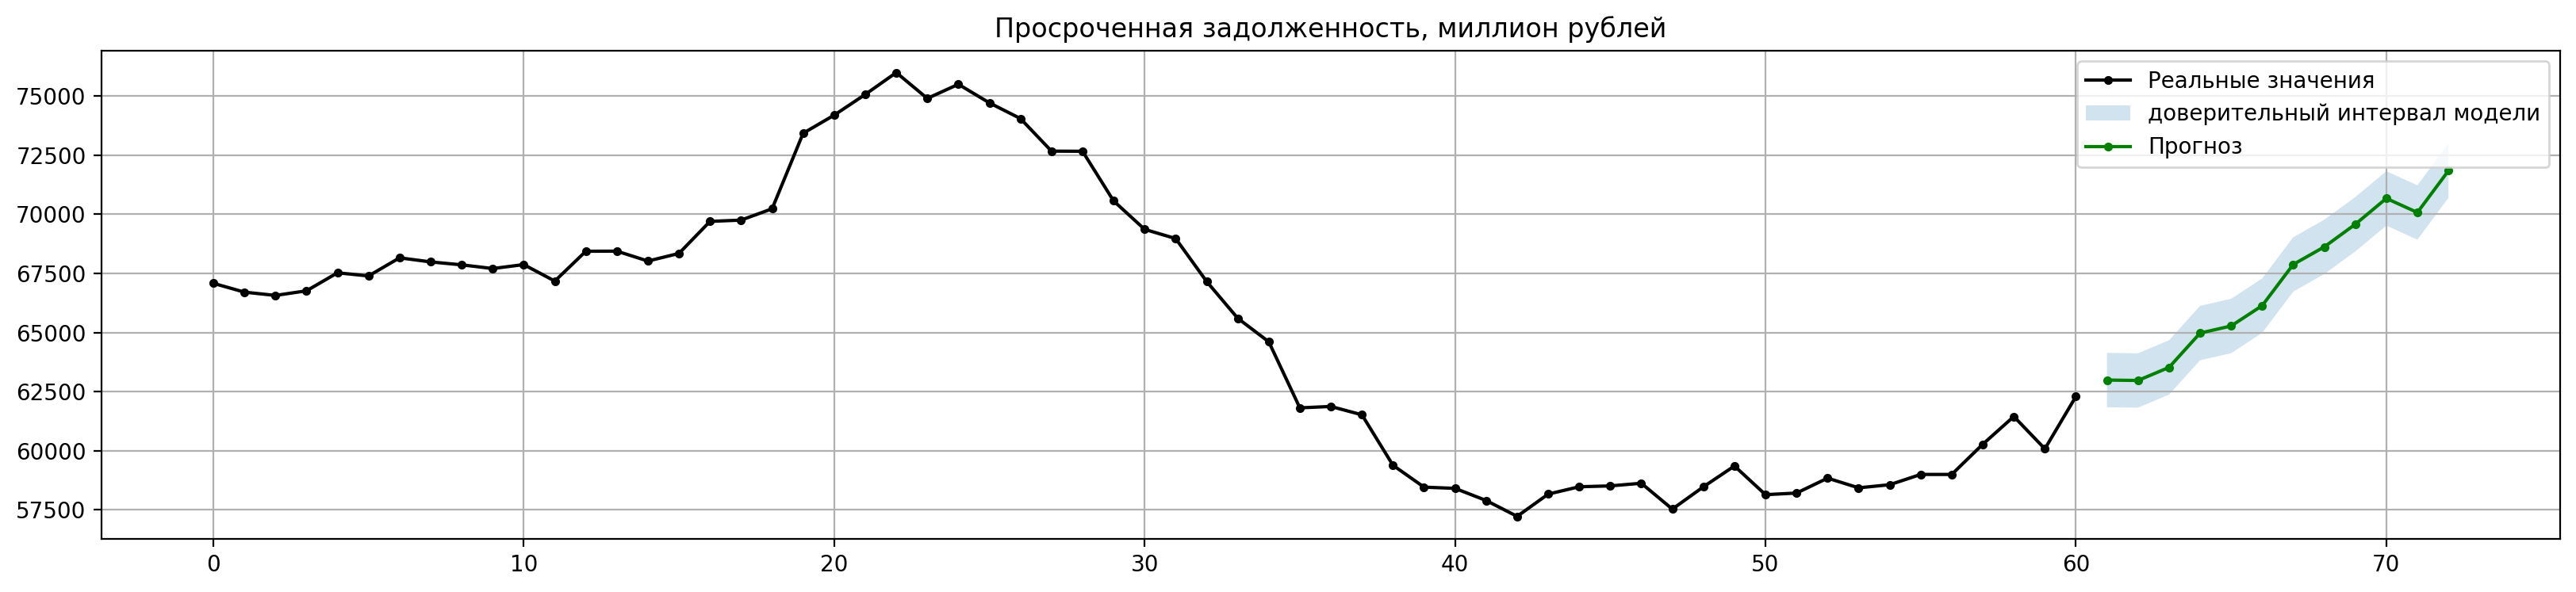

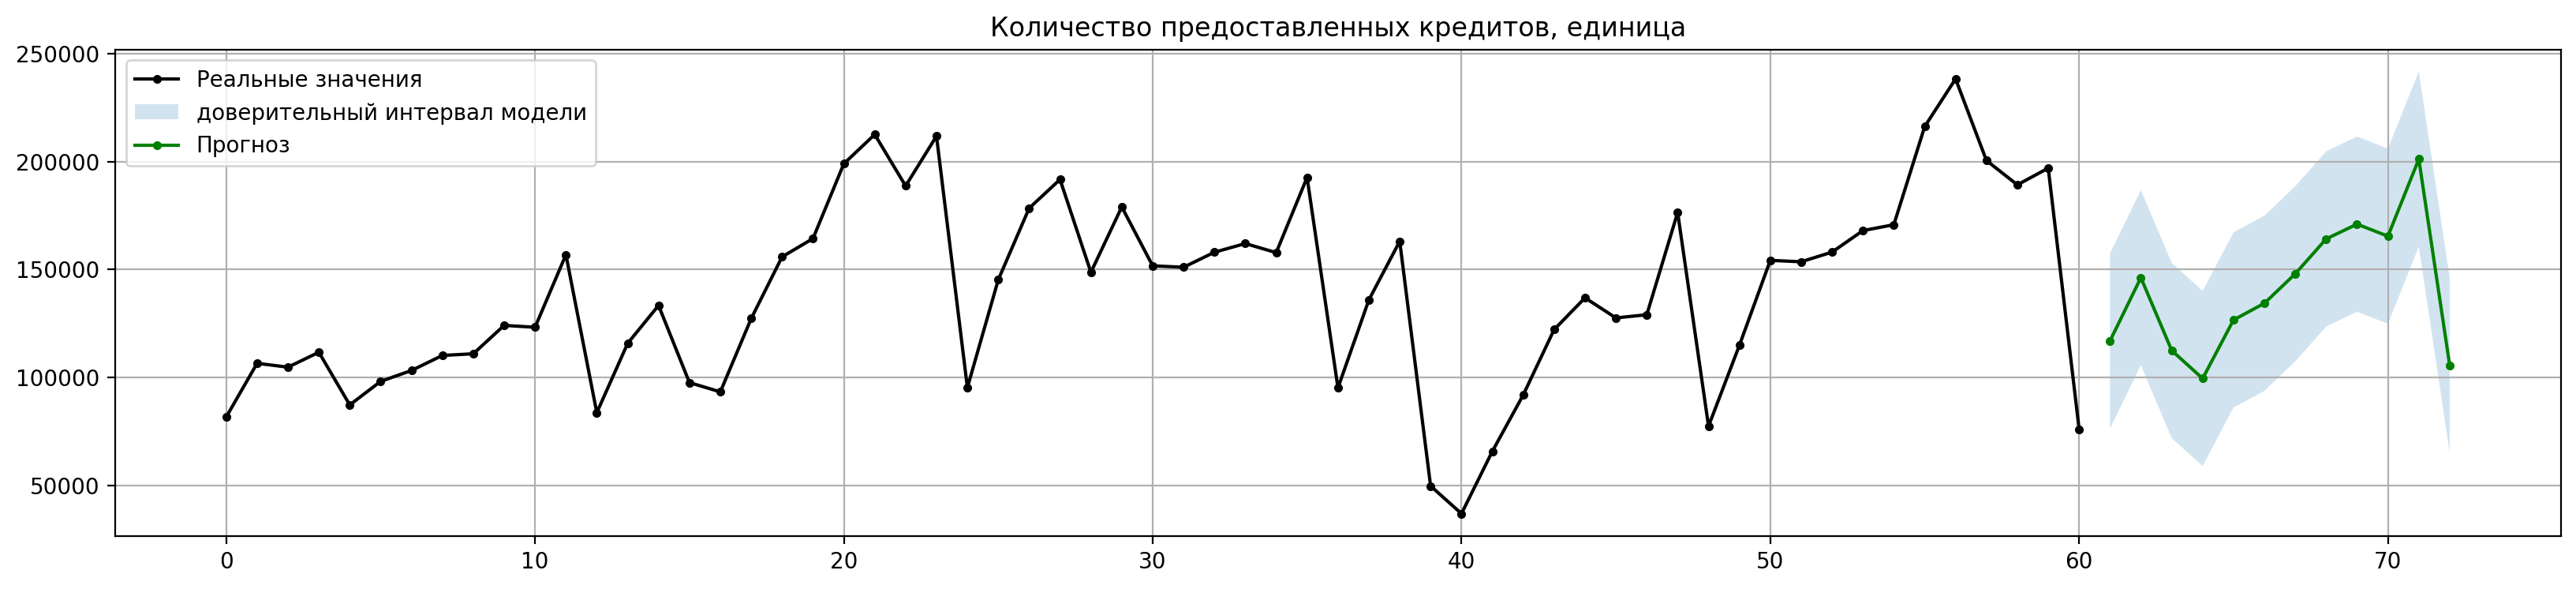

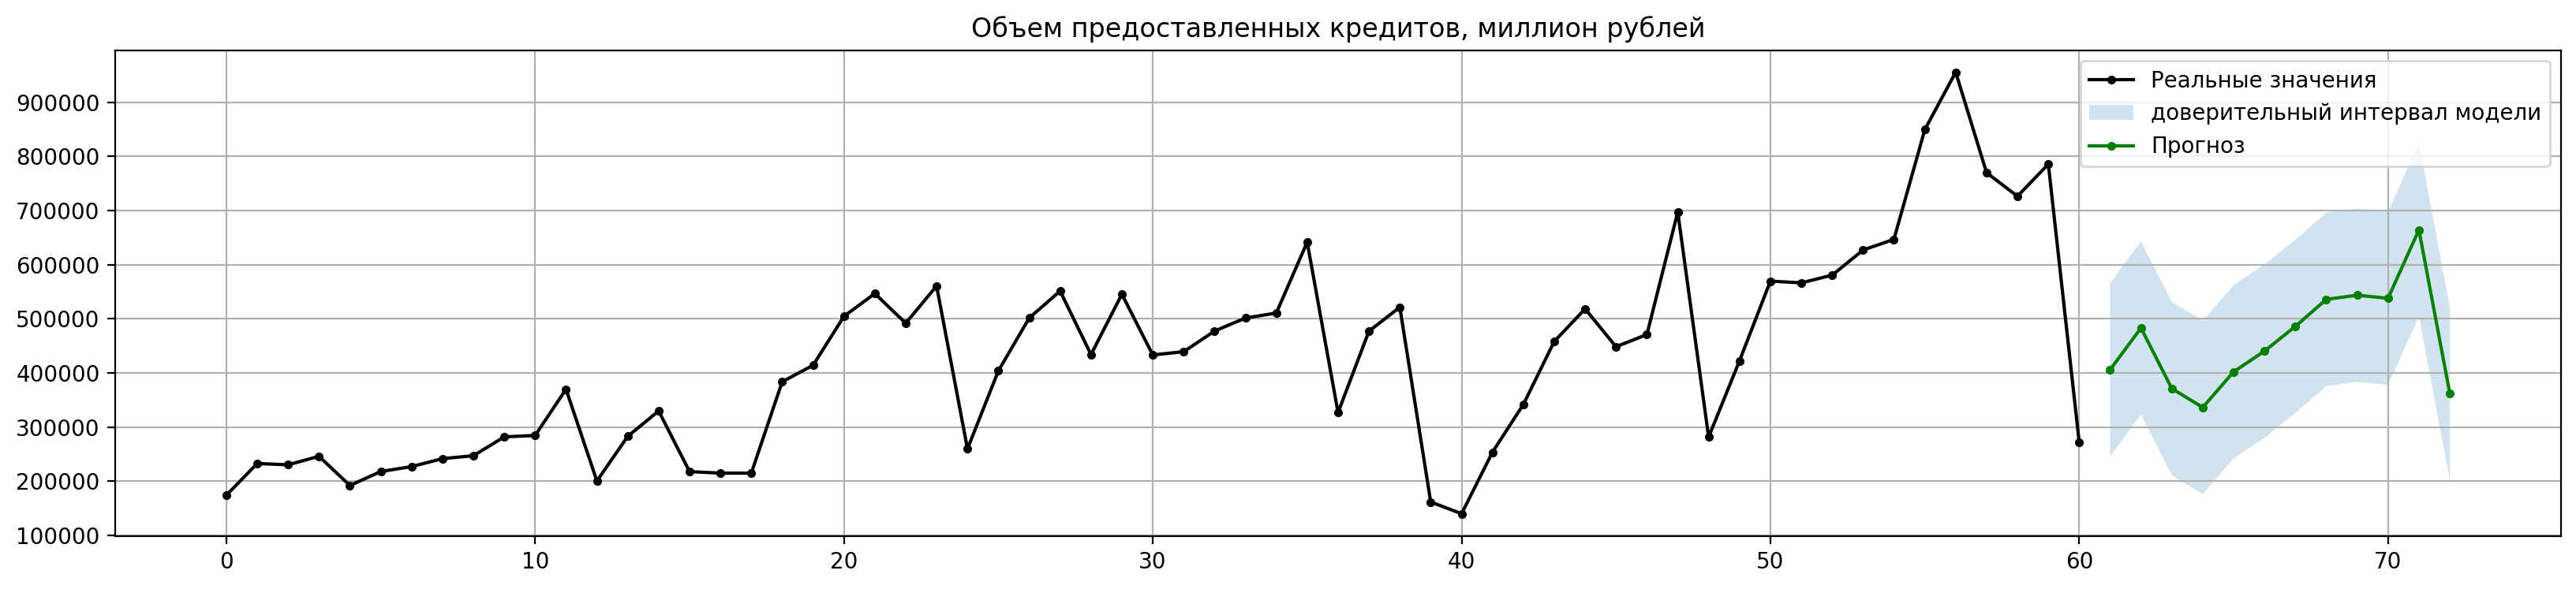

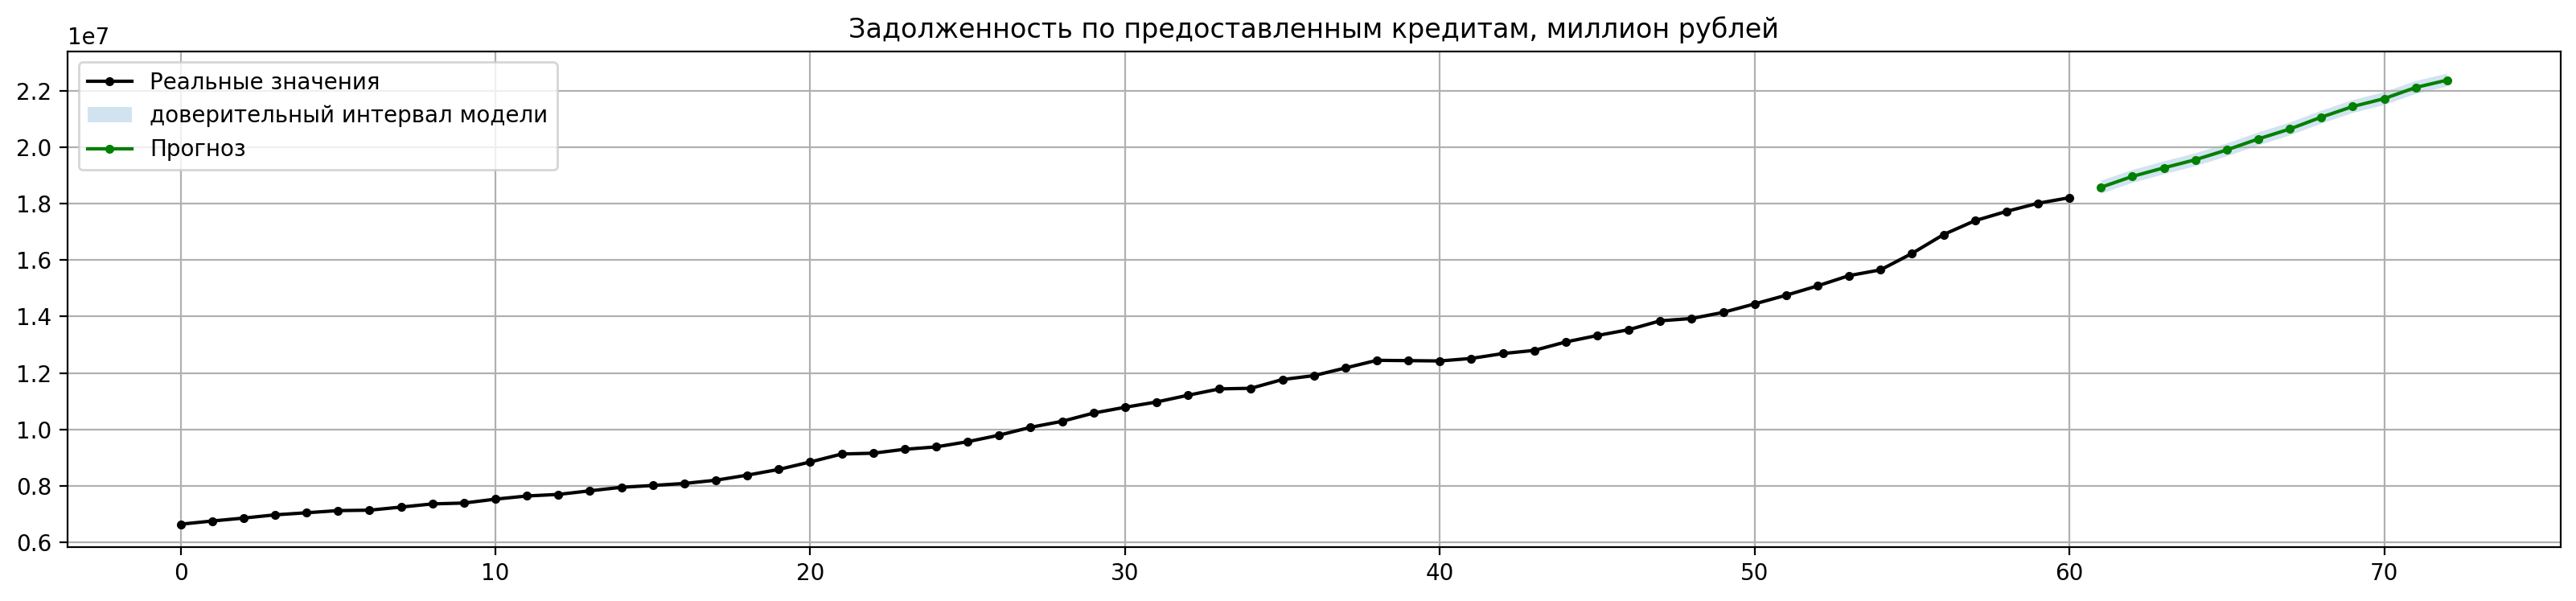

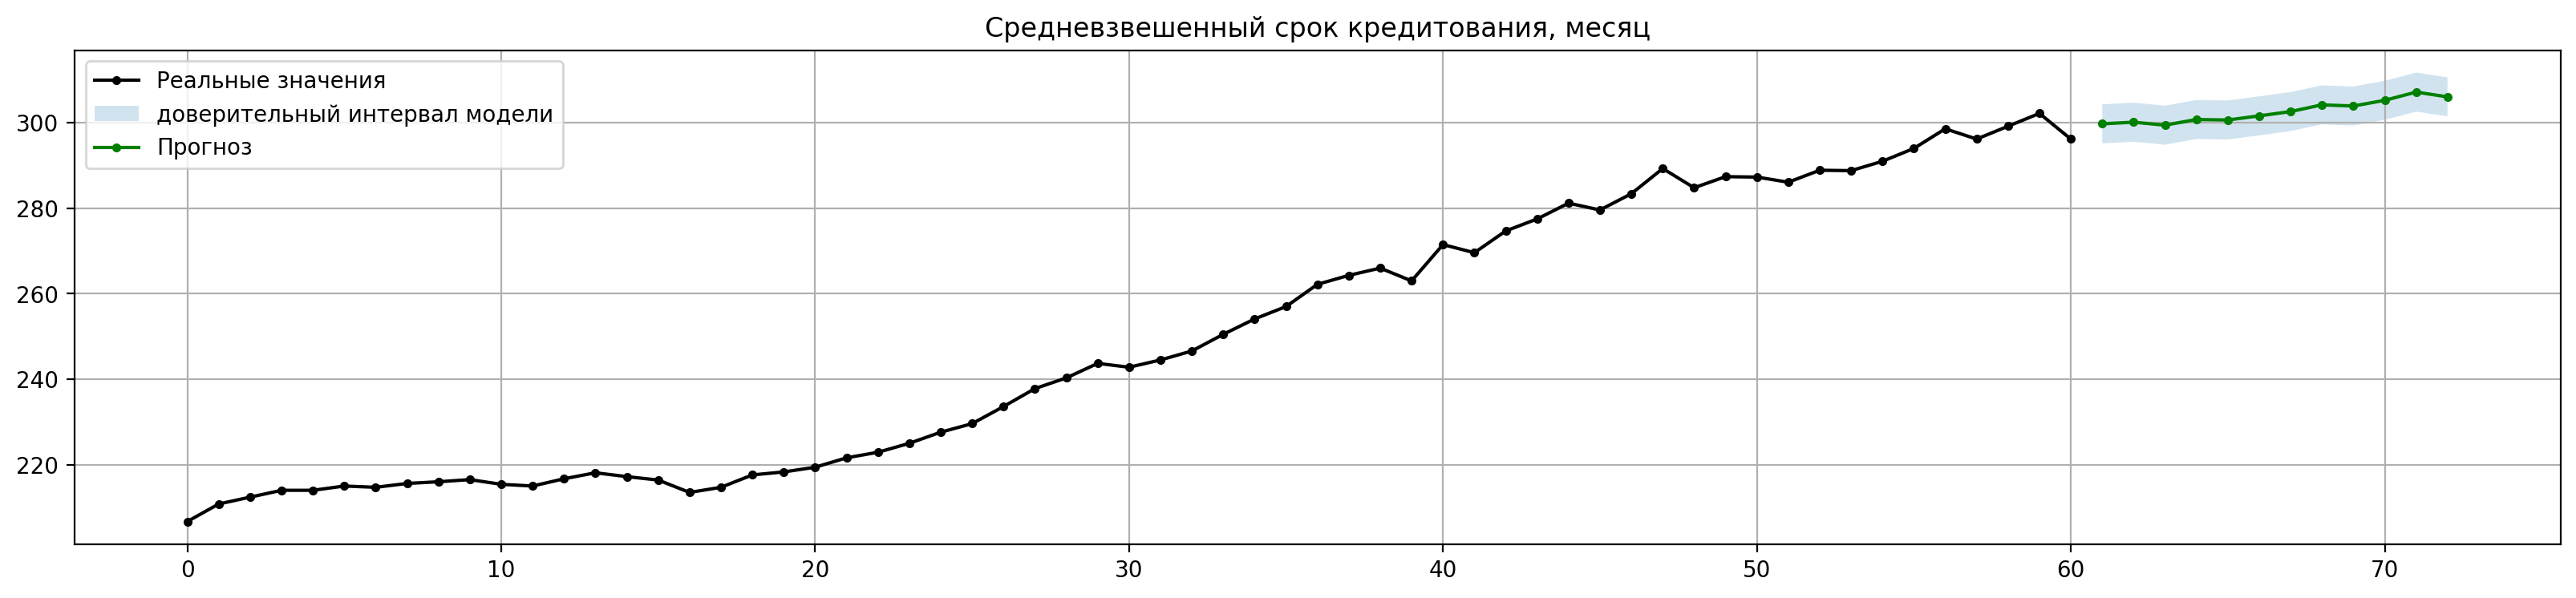

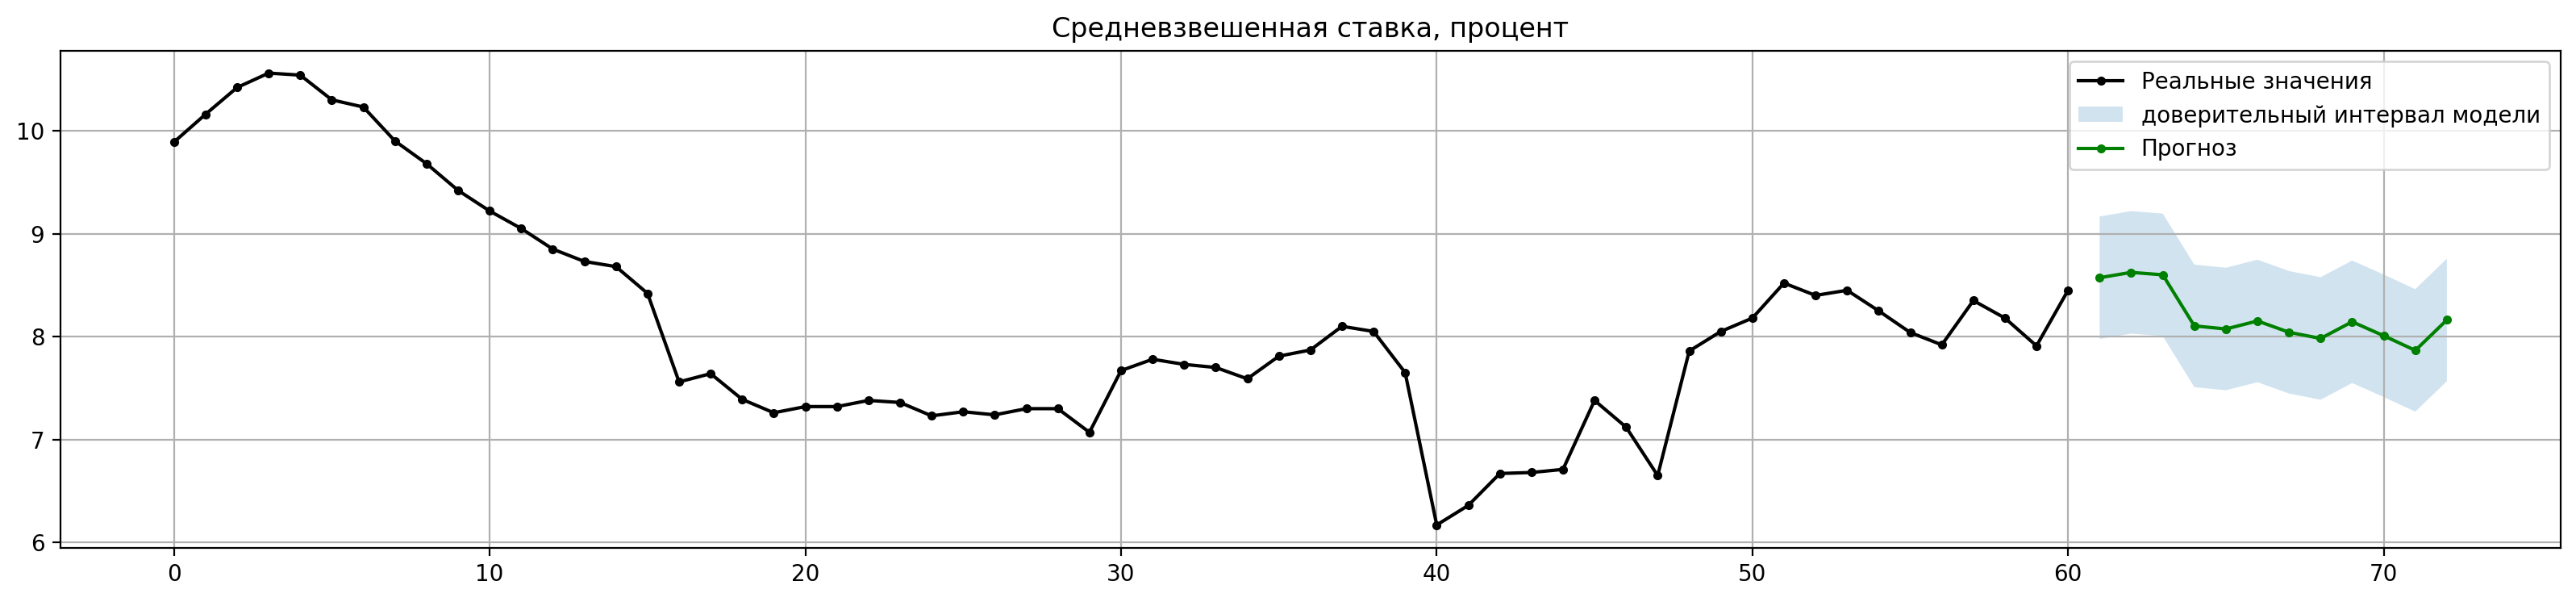

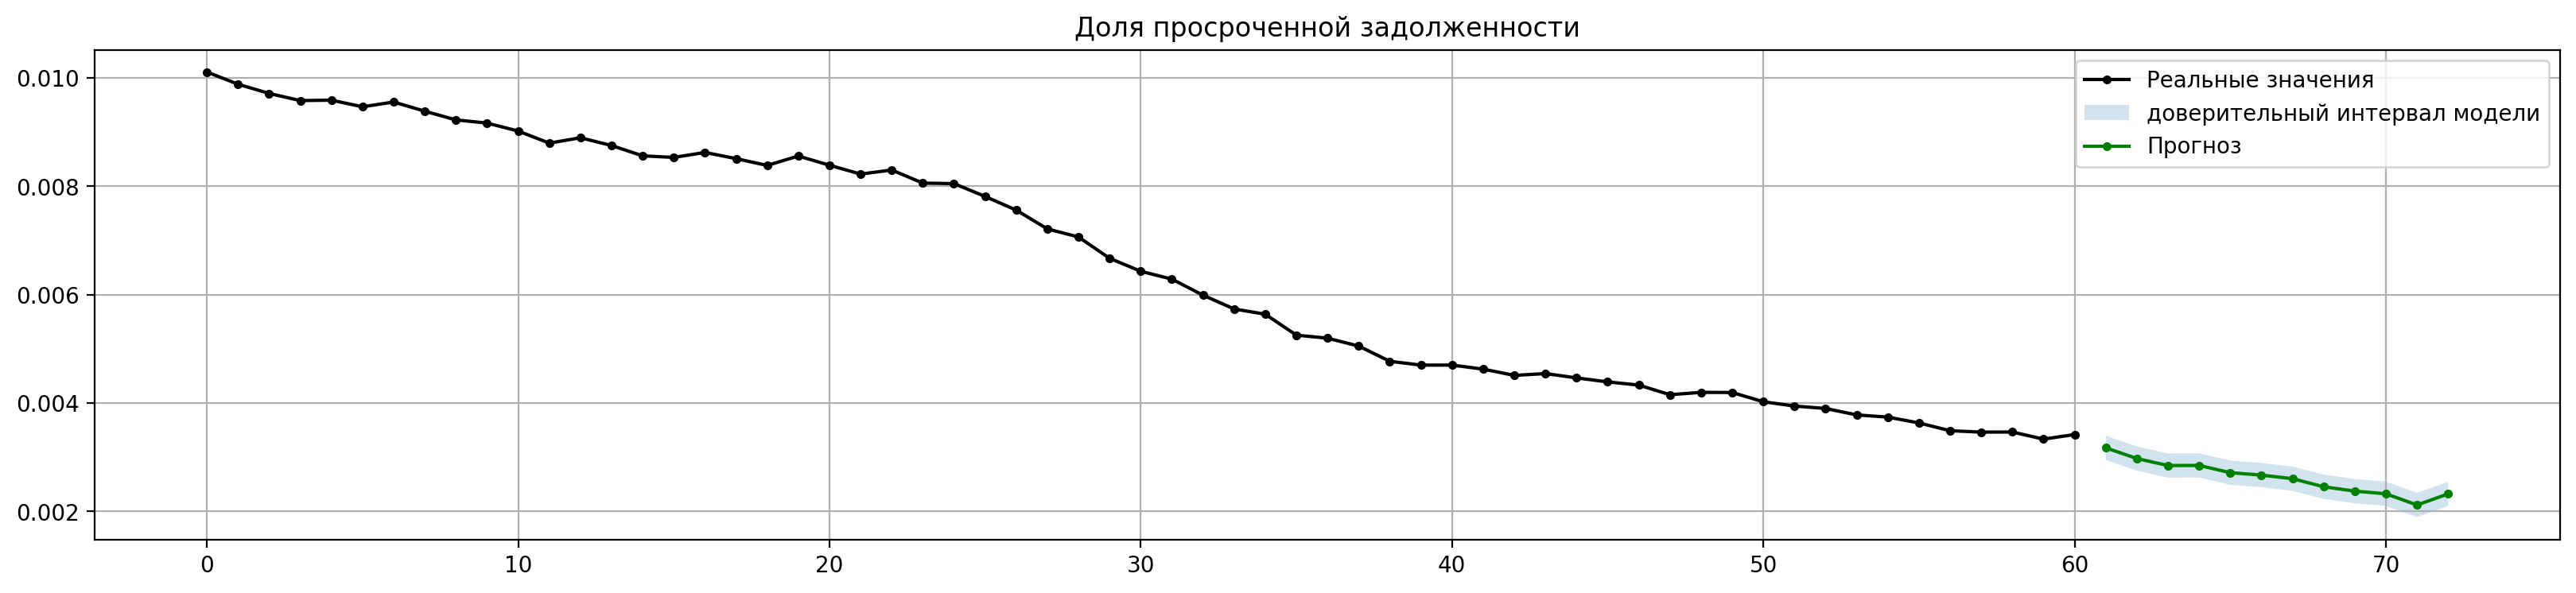

In [ ]:
for col in cols:
    forecast_graph(df[col], title = col)